# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

## Import Keras

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## Import Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Data Preprocessing

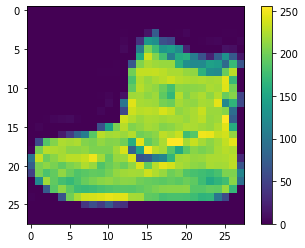

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale values to 0, 1 range normalization

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Data verification, correct image format in first 25 images

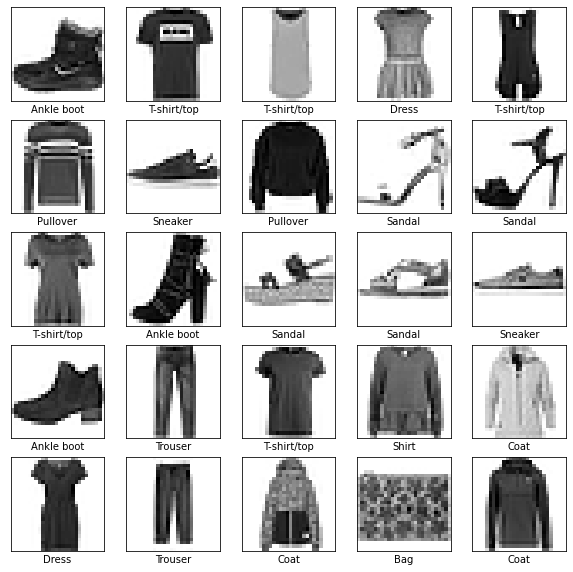

In [24]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build Model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

## Train Model

In [31]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9836
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9834
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - accuracy: 0.9846
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9856
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0404 - accuracy: 0.9845
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9840
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9853
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9845
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9847
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.038

## Accuracy Evaluation

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=10)
print("\nTest Accuracy: ", test_acc, " Test Loss: ", test_loss)


Test Accuracy:  0.8895999789237976  Test Loss:  0.891833484172821


## Make Predictions

Convert the classification model to prediction model with attaching a softmax layer from logits to probabilities, which are easier to interpret.

In [35]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [36]:
predictions = probability_model.predict(test_images)

The model gives 10 kinds of class prediction probabilities.

In [37]:
predictions[0]

array([8.3719865e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.1536061e-19, 6.4977747e-23, 3.3311023e-17,
       1.8643626e-26, 1.0000000e+00], dtype=float32)

Convert probability confidence to the highest confidence value:

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

## Verify Predictions:

In [41]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

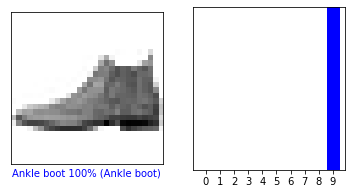

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

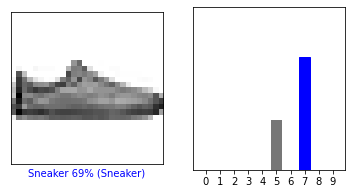

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

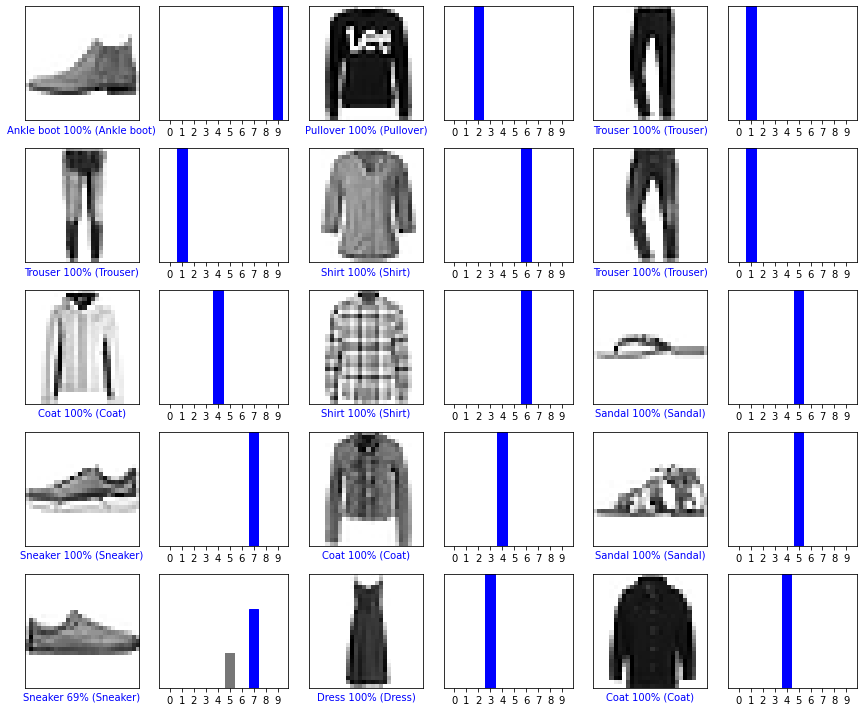

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the Trained Model

(28, 28)


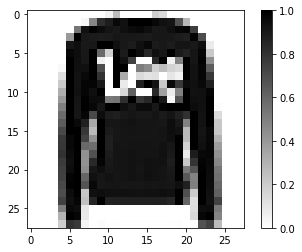

In [52]:
img = test_images[1]
print(img.shape)
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

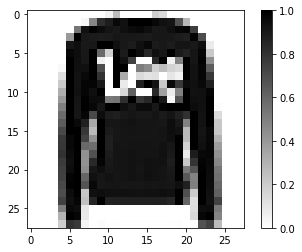

In [53]:
img = (np.expand_dims(img, 0))
plt.figure()
plt.imshow(img[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Prediction Result:  Pullover


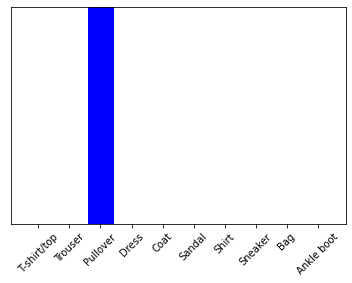

In [57]:
predictions_single = probability_model.predict(img)
print("Prediction Result: ", class_names[np.argmax(predictions_single[0])])
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)